In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
visa_df=pd.read_csv(r"C:\Users\Admin\Documents\naresh IT\EDA(EXPOLRETREE DATA  ANALYSIS)\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
cat_col=visa_df.select_dtypes(include='object').columns
num_col=visa_df.select_dtypes(exclude='object').columns
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

# <center> **Bi variate analysis**</center>

- We alrady done uni variate analysis.

- We performed the categorical columns analysis

    - Frequency table(value counts)
 
    - bar chart
 
    - relative frequencytable(value count normalized form)
 
    - pie chart
 
- We perform the numerical column analysis

    - Histogram
 
    - Boxplot
 
    - Outlier analysis
 
    - Filtering the outliers
 
- Now we will do Categorial-Categorical analysis

- Numerical - Numerical analysis

- Categorial - Numerical analysis
 
 

## <center> <b> Categorical to categorical column analysis</b></center>

- lets take 2 cloumns

    - Continent
 
    - Case status
 

In [4]:
# comntinent

visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [5]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**

- Find the Certified observations continent wise

- Find the denide observations continent wise

-  asia XXXXXXX certified XXXXXXX denied 

### Steps

1. Make the 1st condition continent=='Asia'

2. Make the 2nd condition case_status=='certified'

3. Make the 3 rd condition: con1 & con2

4. retrive the dataframe and tahe count 

## 1.Single continent "asia" case status analysis.

In [6]:
conti=visa_df['continent']
cs=visa_df['case_status']
con1=conti=='Asia'
con2=cs=='Certified'
con3= con1 & con2
visa_df[con3]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [7]:
len(visa_df[con3])

11012

## <center>**Multi column analysis(only certificted) using .unique method**</center>

In [8]:
conti.unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [9]:
l1=[] 
for i in visa_df['continent'].unique(): # show data but not in sequence
    con4=visa_df['continent']==i
    con5=visa_df['case_status']=='Certified'
    con6=con4&con5
    count=len(visa_df[con6])
    print(f"The no. of certified visa from {i} is: {count}")
    l1.append(count)
#S1:- i==asia, con4-con==asia,con5-cs=cer, con6-con(asia)&cs(cer), len(con6)==11012, print
#s2:- i==africa, con4-con==africa,con5-cs=cer, con6-con(africa)&cs(cer), len(con6)==397, print

The no. of certified visa from Asia is: 11012
The no. of certified visa from Africa is: 397
The no. of certified visa from North America is: 2037
The no. of certified visa from Europe is: 2957
The no. of certified visa from South America is: 493
The no. of certified visa from Oceania is: 122


In [10]:
pd.DataFrame(zip(visa_df['continent'].unique(),l1),columns=['conmtinent','certified'])

,conmtinent,certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


## <center>**Multi column analysis(certificted + denied) using .unique method**</center>

In [11]:
certified_count=[]
denied_count=[]
for i in visa_df['continent'].unique():
    con4=visa_df['continent']==i
    con5=visa_df['case_status']=='Certified'
    con6=visa_df['case_status']=='Denied'
    con7=con4&con5
    con8=con4&con6
    certified=len(visa_df[con7])
    denied=len(visa_df[con8])
    certified_count.append(certified)
    denied_count.append(denied)

#S1:- i==asia, con4-con==asia,con5-cs=cer, con6-con(asia)&cs(cer), len(con6)==11012, print
#s2:- i==africa, con4-con==africa,con5-cs=cer, con6-con(africa)&cs(cer), len(con6)==397, print

In [12]:
df=pd.DataFrame(zip(visa_df['continent'].unique(),certified_count,denied_count),columns=['conmtinent','certified_velus','denide_value'])
df

,conmtinent,certified_velus,denide_value
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


## <center>**Making new folder**</center>

In [13]:
os.getcwd()

'C:\\Users\\Admin\\Documents\\naresh IT\\EDA(EXPOLRETREE DATA  ANALYSIS)'

In [14]:
# Creating main folder + sub folder inside main folder
try:
    cwd=os.getcwd()
    new_dir='bivariate analysis' # main folder
    n_d='datasets' # sub folder
    new_fol=os.path.join(cwd,new_dir,n_d) # join path till sub folder
    os.makedirs(new_fol)
except Exception as e:
    print(f'😭sorry buuddy {e}')

😭sorry buuddy [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Admin\\Documents\\naresh IT\\EDA(EXPOLRETREE DATA  ANALYSIS)\\bivariate analysis\\datasets'


In [15]:
os.listdir('bivariate analysis')

['datasets']

## <center>**Multi column analysis(only certificted) using .value_counts().keys() method**</center>

In [16]:
certified_count=[]
denied_count=[]
for i in visa_df['continent'].value_counts().keys(): # will provide sequenced data
    con4=visa_df['continent']==i
    con5=visa_df['case_status']=='Certified'
    con6=visa_df['case_status']=='Denied'
    con7=con4&con5
    con8=con4&con6
    certified=len(visa_df[con7])
    denied=len(visa_df[con8])
    certified_count.append(certified)
    denied_count.append(denied)

#S1:- i==asia, con4-con==asia,con5-cs=cer, con6-con(asia)&cs(cer), len(con6)==11012, print
#s2:- i==africa, con4-con==africa,con5-cs=cer, con6-con(africa)&cs(cer), len(con6)==397, print

In [17]:
df=pd.DataFrame(zip(visa_df['continent'].value_counts().keys(),certified_count,denied_count),columns=['conmtinent','certified_velus','denide_value'])
df

,conmtinent,certified_velus,denide_value
0,Asia,11012,5849
1,Europe,2957,775
2,North America,2037,1255
3,South America,493,359
4,Africa,397,154
5,Oceania,122,70


In [18]:
df.to_csv(f'{new_fol}\\continent_case_status.csv',index=False) # Alwase use "path.join()" variable  
pd.read_csv(f'{new_fol}\\continent_case_status.csv')

,conmtinent,certified_velus,denide_value
0,Asia,11012,5849
1,Europe,2957,775
2,North America,2037,1255
3,South America,493,359
4,Africa,397,154
5,Oceania,122,70


In [19]:
continents=visa_df['continent'].unique()
continents1=visa_df['continent'].value_counts().keys()

df1=pd.DataFrame(zip(certified_count,denied_count),
                 index=continents,#continents1
                 columns=['Certified_counts','Denied_counts'])
df1

,Certified_counts,Denied_counts
Asia,11012,5849
Africa,2957,775
North America,2037,1255
Europe,493,359
South America,397,154
Oceania,122,70


## <center> **Cross Tab(alwase use for cat-cat analysis)**</center>

- The above data frame we can make by using a pandas method: **cross tab**

- It takes 2 arguments

    - index
 
    - column
 
- **syntax: `pd.crosstab(index=df['index_col'],colunms=df['columns'])`**
 
- In above dataframe **index column is: continent**

- in above dataframe **data column is: case_status**

In [20]:
df2=pd.crosstab(index=visa_df['continent'],columns=visa_df['case_status'])
df2

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

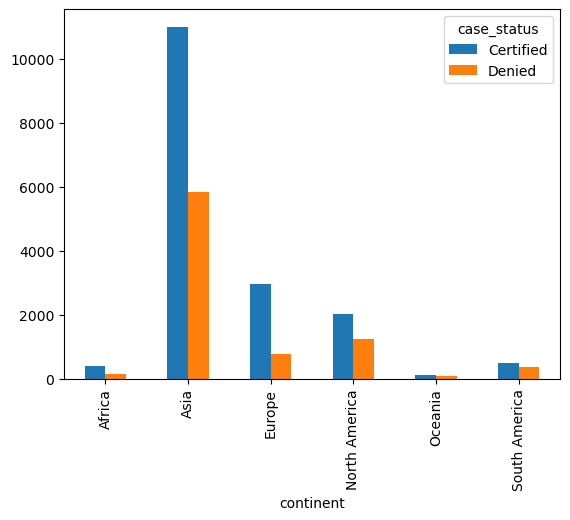

In [21]:
df2.plot(kind='bar')

<Axes: >

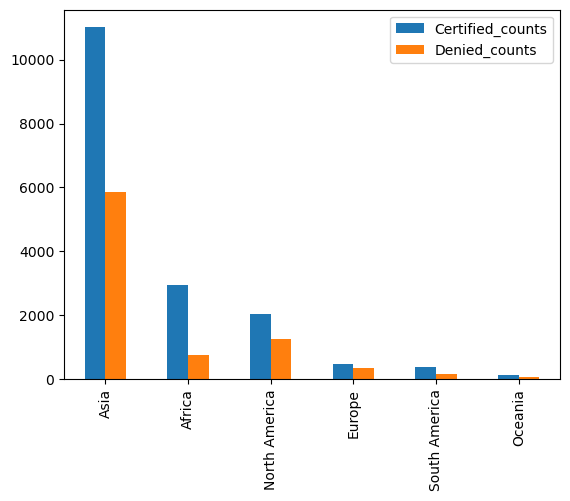

In [22]:
df1.plot(kind='bar')

# ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

# <center> **Mluti variate analysis**</center>

-  More then two column

-  Education

-  Continent

-  Case_status

-  We know from Asia there is  11k accepted visa

-  In that i want to break down based on education

-  here we also use **pd.crasstab**:

    - First choose index column from those column: index=visa_df['continent']
 
    - keep remaning columnn in a list and pass as data column: columns=[edu,case_status]

In [23]:
idx=visa_df['continent']
col=[visa_df['education_of_employee'],visa_df['case_status']]
df3=pd.crosstab(index=idx, columns=col)
df3

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

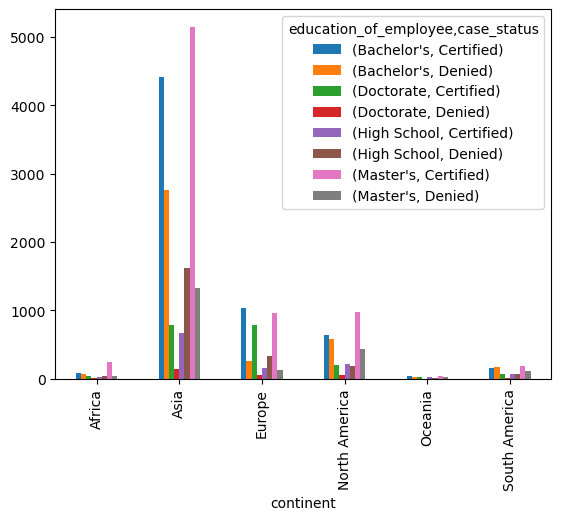

In [24]:
df3.plot(kind='bar')

In [25]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns, os

In [26]:
visa_df=pd.read_csv(r"C:\Users\Admin\Documents\naresh IT\EDA(EXPOLRETREE DATA  ANALYSIS)\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [27]:
cat_col=visa_df.select_dtypes(include='object').columns
num_col=visa_df.select_dtypes(exclude='object').columns

## <center>**Numerical vs  Numerical  ananlysis**</center>

- To understand Numerical column relatin between 2 numerical columns.
- use **scatter plot**--> gives relayion B/W 2 numerical columns.

- Bar chart - pie chart - histogram - scatter plot

- sactter plot under matplotlib packege.

- **plt.scatter**

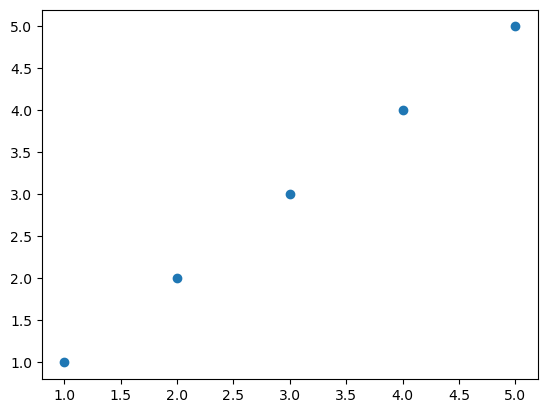

In [28]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)

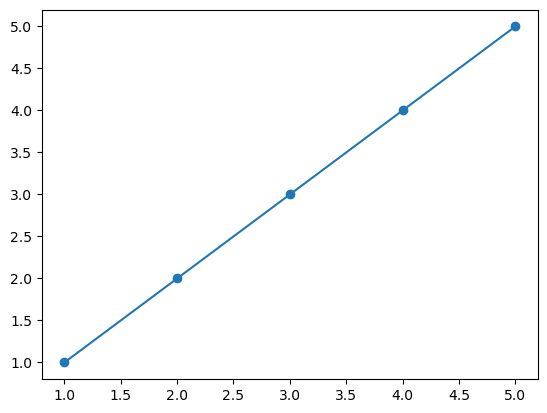

In [29]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

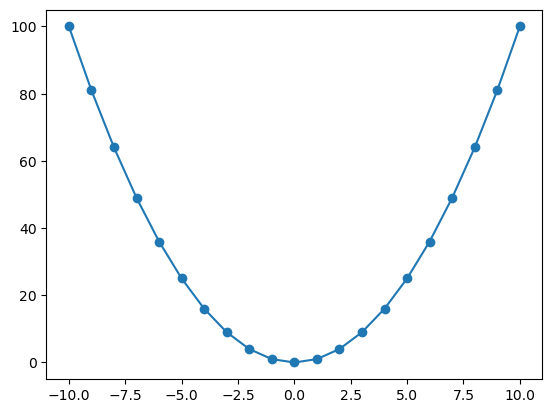

In [30]:
x=[i for i in range(-10,11)]
y=[i*i for i in(x)]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [31]:
# step-1: Read one numerical column
# step-2: read 2nd numerical column 
# step-3: apply the scatter plot

In [32]:
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

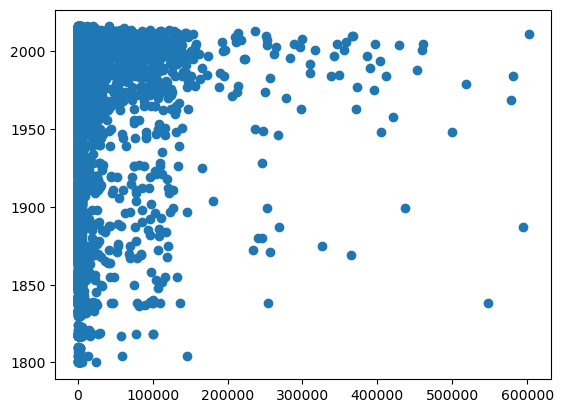

In [33]:
num_emp=visa_df['no_of_employees']
pw=visa_df['yr_of_estab']
plt.scatter(num_emp,pw)
plt.show()

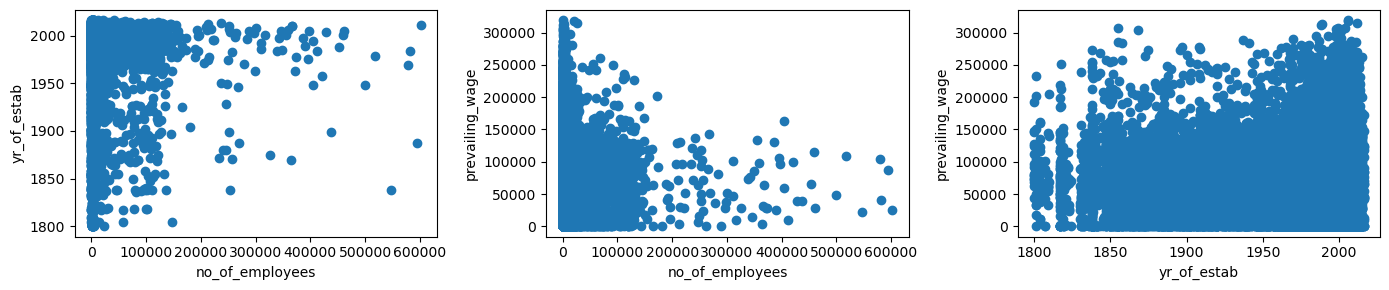

In [34]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
#####################################
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
######################################
plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
######################################
plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
######################################
plt.tight_layout()    
plt.show()

In [35]:
# Mean deviation
# Absolut mean deviation
# Variance
# Covariance
# Correlation coeffiecient

- Implement the Covariance function

- Covariance vs Correlation

    - Covariance will tell about the columns have relation or not.

    - **Covariance will explain about relation status**

        - postive relation 

        - neagtive relation 

        - no relation

    - **Correlation tells about how much relation between two variables**

    - It denotes with 'r'

    - r varies from -1 to 1

    - `-1 to 0 indicates negative relation quantity`

    - `0 to 1 indicates postive relation quantity`

    - `0 indicates no relation`


<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="ZDK8ZqXdMeWN4-EPu63cgQI_13" data-atf="0">

## **Method name: corr()**

In [36]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


## **Heat map**

- Heat map is one of the important visualization method , to show the Matrix form of values

- It is under **seaborn** package

- In every matrix we have heighest values and lowest values available

- Heat meap will give colour visuliation

- Also it provides color bar , which color indicates which value

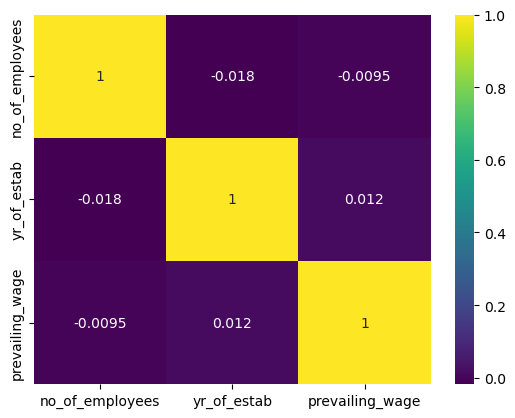

In [52]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='viridis')
plt.show()

- By seeing the Graphs we might not say the relation status. corelated or not?

- It is best practice get the percentage of relation using Correlation matrix.

- All 3 columns having approximately zero percentage of relation

- Which indicates all the columns having no relation.

- **No relation means independent each other**

- **In ML we expect the input columns should be independent each other**

- Corr method gives matrix view

- we have 3 columns, so 3*3 total 9 fields 

- If a data has 20 columns then 20*20 total 400 fileds

- Thats why **always go with Heat map visulaization**